### PART 1
### Google Play Store apps and reviews
Mobile apps are everywhere. They are easy to create and can be lucrative. Because of these two factors, more and more apps are being developed. In this notebook,I have done a comprehensive analysis of the Android app market by comparing over ten thousand apps in Google Play across different categories.
### datasets:
### googleplaystore.csv:
contains all the details of the applications on Google Play. There are 13 features that describe a given app.
### googleplaystore_user_reviews.csv:
contains 100 reviews for each app(most helpful first). The text in each review has been pre-processed and attributed with three new features: Sentiment (Positive, Negative or Neutral), Sentiment Polarity and Sentiment Subjectivity.

In [57]:
# Read in dataset
import pandas as pd
apps_with_duplicates = pd.read_csv('googleplaystore.csv')

# Drop duplicates
apps = apps_with_duplicates.drop_duplicates()

# Printing the total number of apps
print('Total number of apps in the dataset = ', len(apps.index))

# Printing a summary of apps dataframe
print(apps.info())


apps.head()

Total number of apps in the dataset =  10358
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10358 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10358 non-null  object 
 1   Category        10358 non-null  object 
 2   Rating          8893 non-null   float64
 3   Reviews         10358 non-null  object 
 4   Size            10358 non-null  object 
 5   Installs        10358 non-null  object 
 6   Type            10357 non-null  object 
 7   Price           10358 non-null  object 
 8   Content Rating  10357 non-null  object 
 9   Genres          10358 non-null  object 
 10  Last Updated    10358 non-null  object 
 11  Current Ver     10350 non-null  object 
 12  Android Ver     10355 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB
None


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### PART 2


### Data Cleaning
The four features that I will be working with most frequently are Installs, Size, Rating and Price. The info() function (from the above cell) told that Installs and Price columns are of type object and not int64 or float64.
I proceed to data cleaning and prepare our data to be consumed in our analysis later. Specifically, the presence of special characters (, $ +) in the Installs and Price columns make their conversion to a numerical data type difficult.



In [58]:
# List of characters to remove
chars_to_remove = ['+',',','$','Free','Everyone']
# List of column names to clean
cols_to_clean = ['Installs','Price']

for col in cols_to_clean:
    # Replacing each character with an empty string
    for char in chars_to_remove:
        if char == 'Free' or char == 'Everyone':
            apps[col] = apps[col].astype(str).str.replace(char,'0')
        else:
            apps[col] = apps[col].astype(str).str.replace(char, '')
        
    # Converting col to numeric
    apps[col] = pd.to_numeric(apps[col])

### PART 3

### App categories exploration
With more than 1 billion active users in 190 countries around the world, Google Play continues to be an important distribution platform to build a global audience. For businesses to get their apps in front of users, it's important to make them more quickly and easily discoverable on Google Play. To improve the overall search experience, Google has introduced the concept of 
grouping apps into categories.
In this section,I am going to answer the following questions thorough my analysis:
### 1.Which category has the highest share of (active) apps in the market?
### 2.Is any specific category dominating the market?
### 3.Which categories have the fewest number of apps?
It seems like there are 34 unique app categories present in the dataset. Family and Game apps have the highest market prevalence. Interestingly, Tools, Business and Medical apps are also at the top.On the other hand,'Beauty' category has the fewest number of apps in the dataset.

In [59]:
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

# Printing the total number of unique categories
num_categories = len(apps['Category'].unique())
print('Number of categories = ', num_categories)

# Counting the number of apps in each 'Category' and sort them in descending order
num_apps_in_category = apps['Category'].value_counts().sort_values(ascending = False)

data = [go.Bar(
        x = num_apps_in_category.index, # index = category name
        y = num_apps_in_category.values, # value = count
)]

plotly.offline.iplot(data)

Number of categories =  34


### PART 4

### App ratings distribution
After having witnessed the market share for each category of apps, let's see how all these apps perform on an average. App ratings (on a scale of 1 to 5) impact the discoverability, conversion of apps as well as the company's overall brand image. Ratings are a key performance indicator of an app.

From the research in this section, I found that the average volume of ratings across all app categories is almost 4.19

In [64]:
filt = apps['Rating']== 19.0
apps= apps[~filt]
# Average rating of apps
avg_app_rating = apps['Rating'].mean()
print('Average app rating = ', avg_app_rating)

# Distribution of apps according to their ratings
data = [go.Histogram(
        x = apps['Rating']
)]

# Vertical dashed line to indicate the average app rating
layout = {'shapes': [{
              'type' :'line',
              'x0': avg_app_rating,
              'y0': 0,
              'x1': avg_app_rating,
              'y1': 1000,
              'line': { 'dash': 'dashdot'}
          }] 
          }

plotly.offline.iplot({'data': data, 'layout': layout})

Average app rating =  4.187876743139908


### PART 5

### Relation between the price of apps and their ratings
 For price, some users expect their apps to be free or inexpensive. These problems compound if the developing world is part of your target market.
In this section,I am going to answer the following questions:
### 1. Does the price of an app affect its rating?
### 2. Do users always prefer free apps over paid apps?
I found that the vast majority of apps price themselves under $ 10.Despite being popular,free apps are tend to be rated extremely low in few cases.

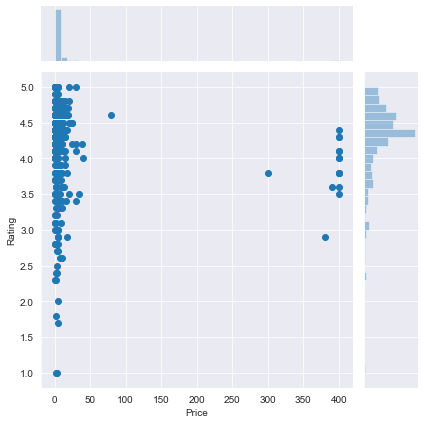

In [65]:
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")

# Filtering rows where Rating values are not null
apps_with_size_and_rating_present = apps[(~apps['Rating'].isnull())]


# Subseting apps whose 'Type' is 'Paid'
paid_apps = apps_with_size_and_rating_present[apps_with_size_and_rating_present['Type'] == 'Paid']

for val in paid_apps['Price']:
    if type(val) == str:
        apps['Price']=val.str.replace('$','')
        
    else:
        continue

#ploting price vs rating
plt2 = sns.jointplot(x = paid_apps['Price'], y = paid_apps['Rating'])

### PART 6

### Relation between app category and app price 
How are companies and developers supposed to make ends meet? What monetization strategies can companies use to maximize profit? The costs of apps are largely based on features, complexity, and platform.

There are many factors to consider when selecting the right pricing strategy for a mobile app. It is important to consider the willingness of customer to pay for an app. A wrong price could break the deal before the download even happens. Potential customers could be turned off by what they perceive to be a shocking cost, or they might delete an app they’ve downloaded after receiving too many ads or simply not getting their money's worth.

Different categories demand different price ranges. Some apps that are simple and used daily, like the calculator app, should probably be kept free. However, it would make sense to charge for a highly-specialized medical app that diagnoses diabetic patients. Below,I have seen that Medical and Family apps are the most expensive. Some medical apps extend even up to 80 dollars. All game apps are reasonably priced below 20 dollars.

,Category,App,Price
4197,FAMILY,most expensive app (H),399.99
4362,LIFESTYLE,💎 I'm rich,399.99
4367,LIFESTYLE,I'm Rich - Trump Edition,400.00
5351,LIFESTYLE,I am rich,399.99
5354,FAMILY,I am Rich Plus,399.99
5355,LIFESTYLE,I am rich VIP,299.99
5356,FINANCE,I Am Rich Premium,399.99
5357,LIFESTYLE,I am extremely Rich,379.99
5358,FINANCE,I am Rich!,399.99
5359,FINANCE,I am rich(premium),399.99


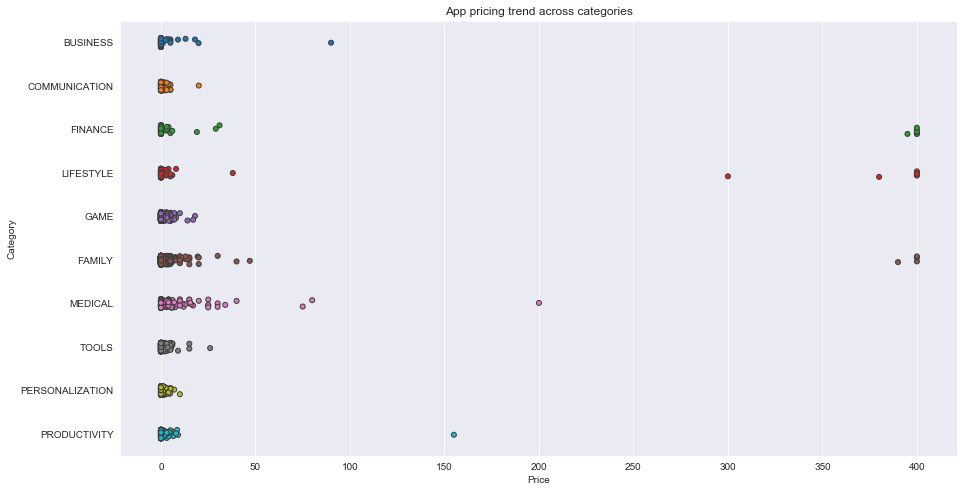

In [46]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Selecting top 10 popular app categories
popular_app_cats = apps[apps['Category'].isin(apps['Category'].value_counts().head(10).index.to_list())]

# Examining the price trend by plotting Price vs Category
ax = sns.stripplot(x = popular_app_cats['Price'], y = popular_app_cats['Category'], jitter=True, linewidth= 1)
ax.set_title('App pricing trend across categories')

# Apps whose Price is greater than 200
apps_above_200 = popular_app_cats.loc[(popular_app_cats['Price'] > 200),['Category', 'App', 'Price']]
apps_above_200

### PART 7

### Filter out the ''junk'' apps
It looks like a bunch of the really expensive apps are "junk" apps or don't have any major impact on the market as the number of users of those apps are extremely low.Most of these apps don't really have a purpose. These apps are developed with malicious intent and try to make money by hoping people accidentally click purchase on their app in the store.

So I filter out these junk apps and re-do my visualization.

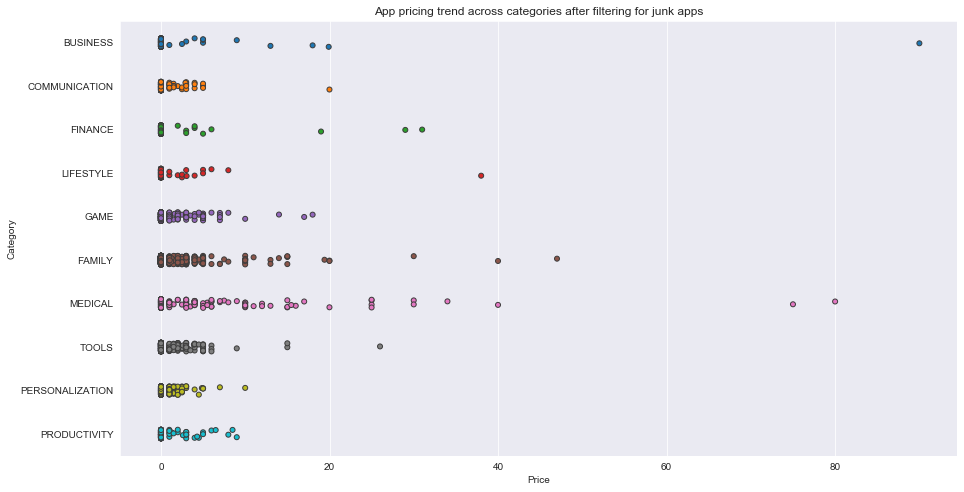

In [66]:
# Selecting apps priced below $100
apps_under_100 = popular_app_cats.loc[(popular_app_cats['Price']< 100),:]

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Examining price vs category with the authentic apps (apps_under_100)
ax = sns.stripplot(x=apps_under_100['Price'], y=apps_under_100['Category'], 
                   jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories after filtering for junk apps')
plt.show()

### PART 8

### Popularity of paid apps vs free apps
For apps in the Play Store today, there are five types of pricing strategies: free, freemium, paid, paymium, and subscription. In this section,I focused on free and paid apps only.

Are paid apps installed as much as free apps? It turns out that paid apps have a relatively lower number of installs than free apps, though the difference is not as stark as I would have expected!

In [67]:
trace0 = go.Box(
    # Data for paid apps
    y=apps[apps['Type'] == 'Paid']['Installs'],
    name = 'Paid'
)

trace1 = go.Box(
    # Data for free apps
    y=apps[apps['Type'] == 'Free']['Installs'],
    name = 'Free'
)

layout = go.Layout(
    title = "Number of downloads of paid apps vs. free apps",
    yaxis = dict(
        type = 'log',
        autorange = True,
        title = 'number of downloads'
    ),
    xaxis = dict(
        title = 'type of app'
    )
)

# Adding trace0 and trace1 to a list for plotting
data = [trace0,trace1]
plotly.offline.iplot({'data': data, 'layout': layout})

### PART 9

### Sentiment analysis on user review
 User reviews for apps can be analyzed to identify if the mood is positive, negative or neutral about an app. For example, positive words in an app review might include words such as 'amazing', 'friendly', 'good', 'great', and 'love'. Negative words might be words like 'malware', 'hate', 'problem', 'refund', and 'incompetent'.

By plotting sentiment polarity scores of user reviews for paid and free apps, we observe that free apps receive a lot of harsh comments, as indicated by the outliers on the negative y-axis. Reviews for paid apps appear never to be extremely negative. This may indicate something about app quality, i.e., paid apps being of higher quality than free apps on average. The median polarity score for paid apps is a little higher than free apps.

In this notebook, I analyzed over ten thousand apps from the Google Play Store. We can use these findings to inform our decisions if we ever wish to create an app ourselves.

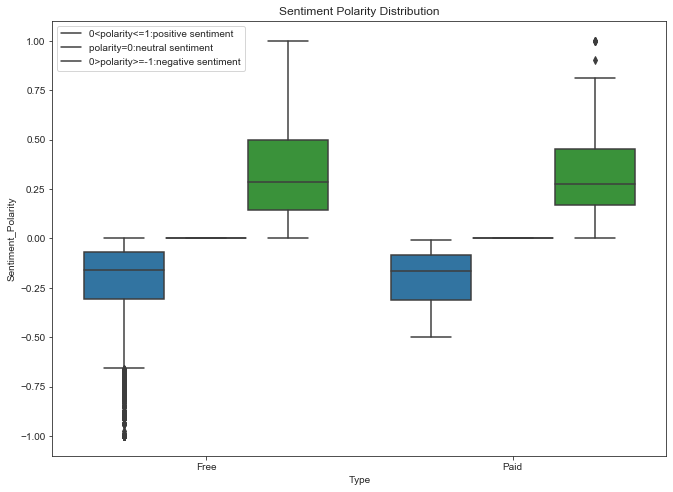

In [68]:
# Loading user_reviews.csv
reviews_df = pd.read_csv('googleplaystore_user_reviews.csv')

# merging the two dataframe on a common column label 'App'
merged_df = pd.merge(apps , reviews_df , on = 'App', how = "inner")

# Droping NA values from Sentiment and Translated_Review columns
merged_df = merged_df.dropna(subset=['Sentiment', 'Translated_Review'])

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)

# User review sentiment polarity for paid vs. free apps
ax = sns.boxplot(x = 'Type', y = 'Sentiment_Polarity', hue = 'Sentiment' ,data = merged_df)
ax.set_title('Sentiment Polarity Distribution')
plt.legend(labels=['0<polarity<=1:positive sentiment','polarity=0:neutral sentiment','0>polarity>=-1:negative sentiment'])
plt.show()